## Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

Para el codigo se trabajara creando una red neuronal con la arquitectura de LeNet-5 y la base de datos Fashion MNIST.


*Andrea Galicia Jimenez  A01177643*


## 1. Preparacion de los datos

Primeramente importamos las librerias necesarias para el desarrollo de nuestro código

In [ ]:
# Importa las librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

Cargamos nuestra base de datos Fashion MNIST que nos ayudara para obtener los datos necesarios que el modelo leera y desplegamos las dimensiones de los arreglos para saber nuestra dimension total.

Es importante mencionar que con esta base de datos no es necesario cargar ningun csv ya que la biblioteca **keras** nos ayuda a traer la informacion que necesitaremos para la creacion de la red neuronal.

In [ ]:
# Carga el conjunto de datos de FASHION MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
# Despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Agregamos las etiquetas de nuestro mapa en una lista para que se clasifiquen y normalizamos las intensidades de los pixeles en las imagenes para obtener fotos visibles y lo mas hd posibles.

In [ ]:
# Mapea etiqueta a nombre
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Normaliza las intensidades de los pixeles de las imágenes
x_train = x_train/255.0
x_test = x_test/255.0

Una vez especificado nuestro mapeo, desplegamos algunas imagenes que el data set Fashion MNIST contiene.

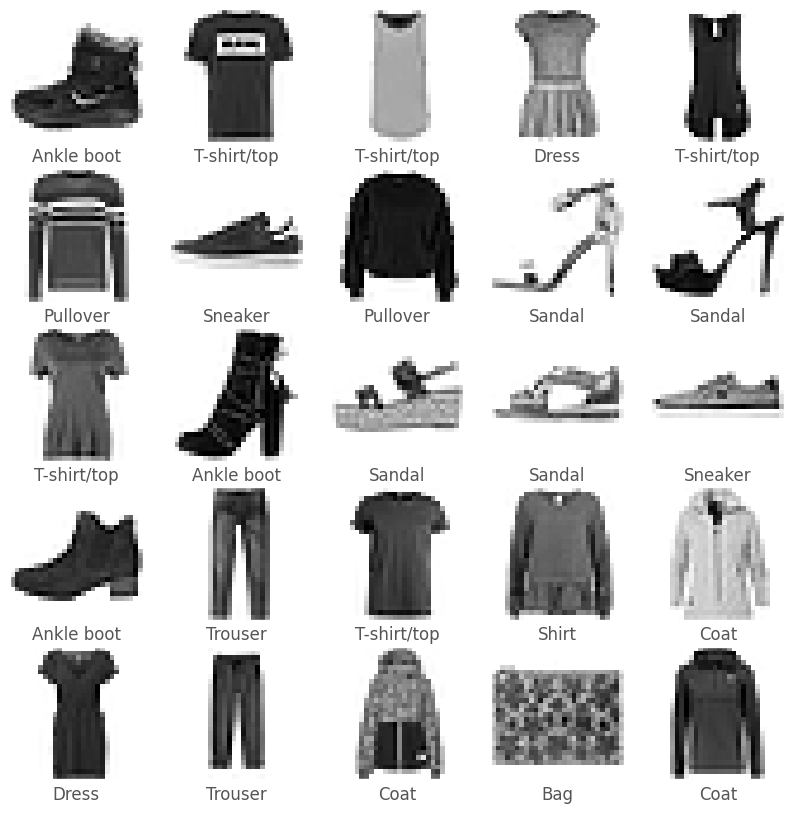

In [ ]:
# Despliega algunas imágenes del dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 2. Contruir el modelo

Comenzamos con la implementacion y construccion del modelo. Primeramente configuramos las capas necesarias o que en este caso le daremos a nuestra red.

In [ ]:
# Configurar las capas
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Codifica las etiquetas usando one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


Se crea el modelo con su arquitectura LeNet-5 el cual contiene capas convolucionales de diferentes tipos, su capa de entrada y la de salida. Después procedemos a definir algunos hiperparametros importantes para el desarrollo del modelo como lo son la capacidad de epocs, los batches y la tasa de aprendizaje.

In [ ]:
# Crea el modelo LeNet-5
model = tf.keras.models.Sequential([

   # C1: feature maps - Convolutional layer:
   tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh'),

   # S2: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C3: feature maps: Convolutional layer:
   tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),

   # S4: Subsampling - Pooling layer:
   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

   # C5: Flatten & Fully connection:
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(120, activation='tanh'),

   # F6: Fully conection:
   tf.keras.layers.Dense(84, activation='tanh'),

   #Output: Softmax
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ])

# **PRUEBA 1**

Se realizaran 3 diferentes pruebas modificando los hiperparametros para mejorar el entrenamiento del modelo lo mas posible.

En esta primera prueba tendremos los hiperparametros de:
- numero de epochs = 10
- tamaño de lotes (batch) = 64

In [ ]:
# Define algunos hiper-parámetros
n_epochs= 10
n_batch= 64
learning_rate= 0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [ ]:
# Configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

## 3.1 Entrenar el modelo

Una vez estructurado lo necesario, procedemos a entrenar el modelo para obtener nuestra cantidad de pérdida y precisión que se tiene, así como para también poder continuar con futuras predicciones.

In [ ]:
# Entrena el modelo para un número fijo de épocas
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/10
938/938 [==============================] - 38s 39ms/step - loss: 0.9130 - accuracy: 0.7033 - val_loss: 0.6419 - val_accuracy: 0.7564
Epoch 2/10
938/938 [==============================] - 35s 38ms/step - loss: 0.5627 - accuracy: 0.7972 - val_loss: 0.5366 - val_accuracy: 0.8032
Epoch 3/10
938/938 [==============================] - 36s 39ms/step - loss: 0.4865 - accuracy: 0.8258 - val_loss: 0.4805 - val_accuracy: 0.8243
Epoch 4/10
938/938 [==============================] - 36s 38ms/step - loss: 0.4418 - accuracy: 0.8419 - val_loss: 0.4618 - val_accuracy: 0.8276
Epoch 5/10
938/938 [==============================] - 36s 39ms/step - loss: 0.4122 - accuracy: 0.8526 - val_loss: 0.4306 - val_accuracy: 0.8470
Epoch 6/10
938/938 [==============================] - 37s 40ms/step - loss: 0.3914 - accuracy: 0.8585 - val_loss: 0.4090 - val_accuracy: 0.8506
Epoch 7/10
938/938 [==============================] - 35s 37ms/step - loss: 0.3753 - accuracy: 0.8647 - val_loss: 0.3919 - val_accuracy:

## 4.1 Evaluación del modelo
Evaluamos nuestro modelo ajustando dos gráficas diferentes, una que nos muestra el entrenamiento y validación de la precisión y otra que nos muestra el entrenamiento y validación de la pérdida, esto con el fin de poder ver visualmente nuestro resultado del modelo.

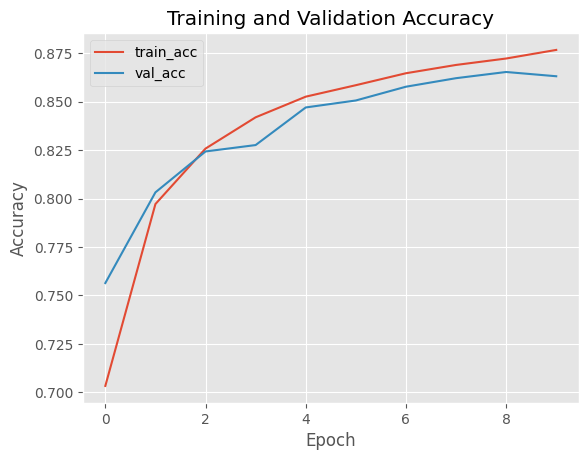

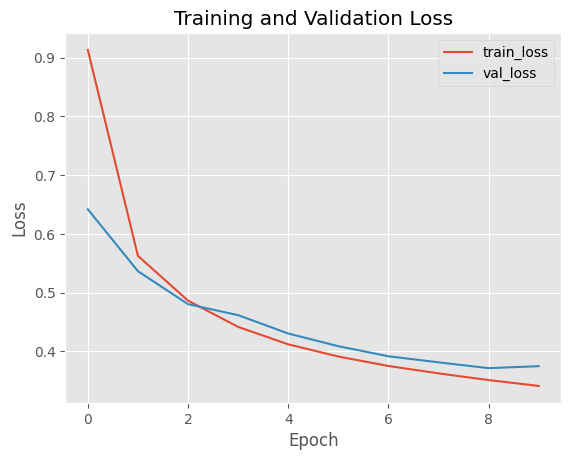

In [ ]:
# Despliega las curvas de aprendizaje
H = history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# Precisión del último epoch de entrenamiento y validación
final_train_accuracy = H.history["accuracy"][-1]
final_val_accuracy = H.history["val_accuracy"][-1]

print("Precisión final de entrenamiento:", final_train_accuracy)
print("Precisión final de validación:", final_val_accuracy)


Precisión final de entrenamiento: 0.9526500105857849
Precisión final de validación: 0.9065999984741211


## **5.1 Diagnosticos y explicaciones**
Se diagnosticara los siguientes tres aspectos:
- El grado de bias (sesgo) como bajo, medio, alto
- El grado de varianza: bajo, medio, alto
- El nivel de ajuste del modelo: underfitt, fitt, overfitt

In [ ]:
# Diagnóstico de Sesgo (Bias)
# Calcula el accuracy en el conjunto de entrenamiento y prueba
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

if train_acc > test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de entrenamiento)"
elif train_acc < test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de prueba)"
else:
    bias_diagnosis = "Sesgo bajo (bien equilibrado)"


In [ ]:
# Diagnóstico de Varianza
# Calcula la diferencia entre las pérdidas de entrenamiento y prueba
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
loss_difference = train_loss - test_loss

if loss_difference > 0.1:
    variance_diagnosis = "Varianza alta (sobreajuste pronunciado)"
elif loss_difference < 0.1:
    variance_diagnosis = "Varianza baja (bien generalizado)"
else:
    variance_diagnosis = "Varianza media (generalización moderada)"

In [ ]:
# Diagnóstico de Ajuste del Modelo
if train_acc < 0.8:
    fitting_diagnosis = "Underfitting (modelo demasiado simple)"
elif train_acc >= 0.8 and train_acc < 0.95:
    fitting_diagnosis = "Ajuste adecuado (modelo bien equilibrado)"
else:
    fitting_diagnosis = "Overfitting (modelo complejo, posible sobreajuste)"

In [ ]:
# Muestra los diagnósticos
print("Diagnóstico de Sesgo (Bias):", bias_diagnosis)
print("Diagnóstico de Varianza:", variance_diagnosis)
print("Diagnóstico de Ajuste del Modelo:", fitting_diagnosis)

Diagnóstico de Sesgo (Bias): Sesgo alto (overfitting hacia datos de entrenamiento)
Diagnóstico de Varianza: Varianza baja (bien generalizado)
Diagnóstico de Ajuste del Modelo: Ajuste adecuado (modelo bien equilibrado)


Para esta primera prueba podemos notar que los resultados indican que el modelo presenta un alto sesgo (overfitting hacia los datos de entrenamiento), lo que significa que se ajusta demasiado a los datos de entrenamiento, capturando incluso el ruido en lugar de los patrones reales. Sin embargo, la varianza es baja (bien generalizado), lo que implica que el modelo generaliza bien a nuevos datos y no es muy sensible a pequeñas fluctuaciones en los datos de entrenamiento. En resumen, **el modelo parece estar bien equilibrado y es capaz de aprender patrones importantes en los datos sin ajustarse en exceso.**

# **PRUEBA 2**

En esta segunda prueba tendremos los hiperparametros de:
- numero de epochs = 50
- numero de lotes (batch) = 32

In [ ]:
# Define algunos hiper-parámetros
n_epochs= 50
n_batch= 32
learning_rate= 0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [ ]:
# Configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

## 3.2 Entrenar el modelo

In [ ]:
# Una disculpa de antemano por lo tardado en esta seccion jejeje
# Entrena el modelo para un número fijo de épocas
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/50
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0313 - accuracy: 0.9924 - val_loss: 0.3972 - val_accuracy: 0.9000
Epoch 2/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0275 - accuracy: 0.9941 - val_loss: 0.4065 - val_accuracy: 0.9015
Epoch 3/50
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0260 - accuracy: 0.9949 - val_loss: 0.4027 - val_accuracy: 0.9012
Epoch 4/50
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0256 - accuracy: 0.9944 - val_loss: 0.4080 - val_accuracy: 0.9022
Epoch 5/50
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0236 - accuracy: 0.9954 - val_loss: 0.4153 - val_accuracy: 0.9034
Epoch 6/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0230 - accuracy: 0.9958 - val_loss: 0.4160 - val_accuracy: 0.9028
Epoch 7/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0218 - accuracy: 0.9962 - val_loss: 0.4188 -

## 4.2 Evaluación del modelo

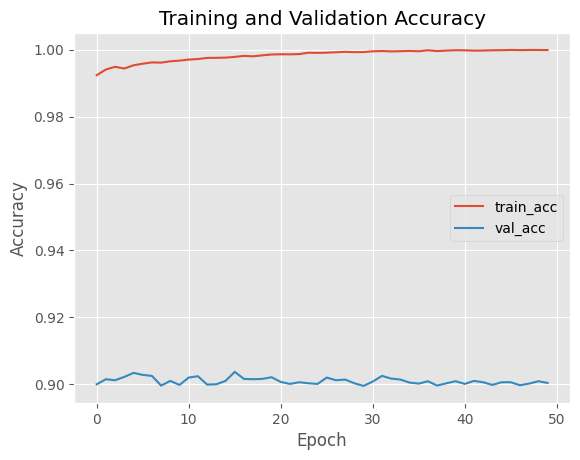

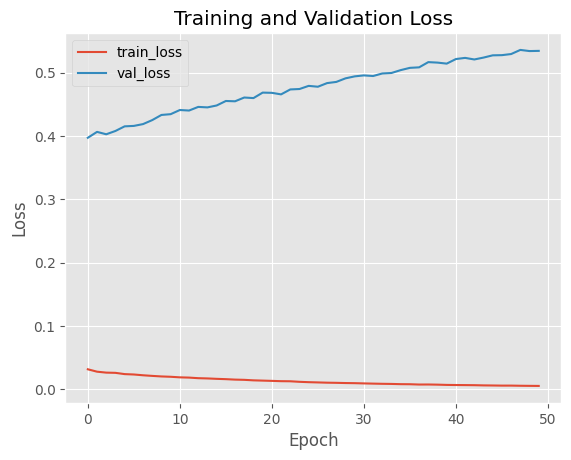

In [ ]:
# Despliega las curvas de aprendizaje
H1 = history1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H1.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0, n_epochs), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H1.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# Precisión del último epoch de entrenamiento y validación
final_train_accuracy = H1.history["accuracy"][-1]
final_val_accuracy = H1.history["val_accuracy"][-1]

print("Precisión final de entrenamiento:", final_train_accuracy)
print("Precisión final de validación:", final_val_accuracy)

Precisión final de entrenamiento: 0.9998999834060669
Precisión final de validación: 0.9003999829292297


## **5.2 Diagnosticos y explicaciones**
Se diagnosticara los siguientes tres aspectos:
- El grado de bias (sesgo) como bajo, medio, alto
- El grado de varianza: bajo, medio, alto
- El nivel de ajuste del modelo: underfitt, fitt, overfitt

In [ ]:
# Diagnóstico de Sesgo (Bias)
# Calcula el accuracy en el conjunto de entrenamiento y prueba
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

if train_acc > test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de entrenamiento)"
elif train_acc < test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de prueba)"
else:
    bias_diagnosis = "Sesgo bajo (bien equilibrado)"

# Diagnóstico de Varianza
# Calcula la diferencia entre las pérdidas de entrenamiento y prueba
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
loss_difference = train_loss - test_loss

if loss_difference > 0.1:
    variance_diagnosis = "Varianza alta (sobreajuste pronunciado)"
elif loss_difference < 0.1:
    variance_diagnosis = "Varianza baja (bien generalizado)"
else:
    variance_diagnosis = "Varianza media (generalización moderada)"

# Diagnóstico de Ajuste del Modelo
if train_acc < 0.8:
    fitting_diagnosis = "Underfitting (modelo demasiado simple)"
elif train_acc >= 0.8 and train_acc < 0.95:
    fitting_diagnosis = "Ajuste adecuado (modelo bien equilibrado)"
else:
    fitting_diagnosis = "Overfitting (modelo complejo, posible sobreajuste)"

# Muestra los diagnósticos
print("Diagnóstico de Sesgo (Bias):", bias_diagnosis)
print("Diagnóstico de Varianza:", variance_diagnosis)
print("Diagnóstico de Ajuste del Modelo:", fitting_diagnosis)

Diagnóstico de Sesgo (Bias): Sesgo alto (overfitting hacia datos de entrenamiento)
Diagnóstico de Varianza: Varianza baja (bien generalizado)
Diagnóstico de Ajuste del Modelo: Overfitting (modelo complejo, posible sobreajuste)


Para esta segunda prueba los resultados señalan que el modelo está experimentando un alto sesgo (overfitting hacia los datos de entrenamiento), lo que indica que se ajusta excesivamente a esos datos específicos, incluso al ruido presente. Aunque la varianza es baja (indicando una buena capacidad de generalización), el diagnóstico de ajuste del modelo sugiere que podría estar sobreajustando debido a su complejidad. En resumen, **el modelo parece estar sesgado hacia los datos de entrenamiento y puede estar sobreajustando, lo que podría requerir ajustes para mejorar su capacidad de generalización.**

# **PRUEBA 3**

En esta tercera prueba tendremos los hiperparametros de:
- numero de epochs = 5
- numero de lotes (batch) = 16

In [ ]:
# Define algunos hiper-parámetros
n_epochs= 5
n_batch= 16
learning_rate= 0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [ ]:
# Configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

## 3.3 Entrenar el modelo

In [ ]:
# Entrena el modelo para un número fijo de épocas
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/5
3750/3750 [==============================] - 56s 15ms/step - loss: 0.0782 - accuracy: 0.9737 - val_loss: 0.5507 - val_accuracy: 0.8923
Epoch 2/5
3750/3750 [==============================] - 44s 12ms/step - loss: 0.0491 - accuracy: 0.9824 - val_loss: 0.5477 - val_accuracy: 0.8931
Epoch 3/5
3750/3750 [==============================] - 45s 12ms/step - loss: 0.0399 - accuracy: 0.9855 - val_loss: 0.5758 - val_accuracy: 0.8930
Epoch 4/5
3750/3750 [==============================] - 43s 12ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.5368 - val_accuracy: 0.8943
Epoch 5/5
3750/3750 [==============================] - 49s 13ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.5271 - val_accuracy: 0.8963


## 4.3 Evaluación del modelo

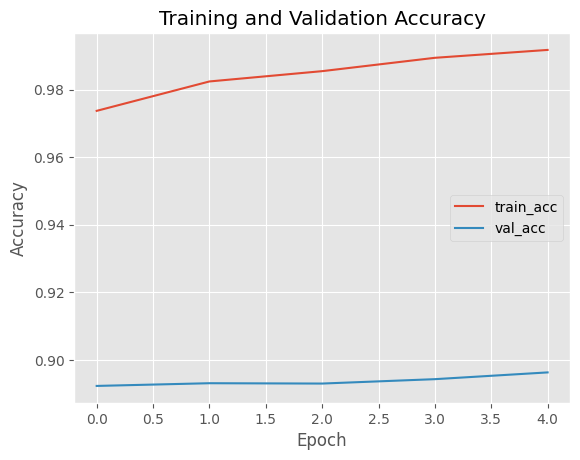

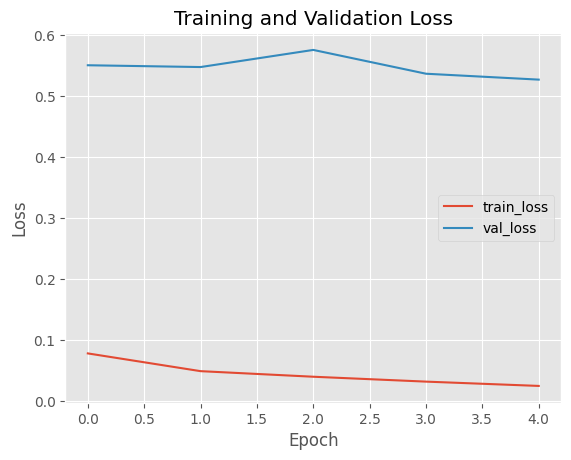

In [ ]:
# Despliega las curvas de aprendizaje
H2 = history2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H2.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0, n_epochs), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H2.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
# Precisión del último epoch de entrenamiento y validación
final_train_accuracy = H2.history["accuracy"][-1]
final_val_accuracy = H2.history["val_accuracy"][-1]

print("Precisión final de entrenamiento:", final_train_accuracy)
print("Precisión final de validación:", final_val_accuracy)

Precisión final de entrenamiento: 0.9917500019073486
Precisión final de validación: 0.8963000178337097


## **5.3 Diagnosticos y explicaciones**
Se diagnosticara los siguientes tres aspectos:
- El grado de bias (sesgo) como bajo, medio, alto
- El grado de varianza: bajo, medio, alto
- El nivel de ajuste del modelo: underfitt, fitt, overfitt

In [ ]:
# Diagnóstico de Sesgo (Bias)
# Calcula el accuracy en el conjunto de entrenamiento y prueba
train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

if train_acc > test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de entrenamiento)"
elif train_acc < test_acc:
    bias_diagnosis = "Sesgo alto (overfitting hacia datos de prueba)"
else:
    bias_diagnosis = "Sesgo bajo (bien equilibrado)"

# Diagnóstico de Varianza
# Calcula la diferencia entre las pérdidas de entrenamiento y prueba
train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
loss_difference = train_loss - test_loss

if loss_difference > 0.1:
    variance_diagnosis = "Varianza alta (sobreajuste pronunciado)"
elif loss_difference < 0.1:
    variance_diagnosis = "Varianza baja (bien generalizado)"
else:
    variance_diagnosis = "Varianza media (generalización moderada)"

# Diagnóstico de Ajuste del Modelo
if train_acc < 0.8:
    fitting_diagnosis = "Underfitting (modelo demasiado simple)"
elif train_acc >= 0.8 and train_acc < 0.95:
    fitting_diagnosis = "Ajuste adecuado (modelo bien equilibrado)"
else:
    fitting_diagnosis = "Overfitting (modelo complejo, posible sobreajuste)"

# Muestra los diagnósticos
print("Diagnóstico de Sesgo (Bias):", bias_diagnosis)
print("Diagnóstico de Varianza:", variance_diagnosis)
print("Diagnóstico de Ajuste del Modelo:", fitting_diagnosis)

Diagnóstico de Sesgo (Bias): Sesgo alto (overfitting hacia datos de entrenamiento)
Diagnóstico de Varianza: Varianza baja (bien generalizado)
Diagnóstico de Ajuste del Modelo: Overfitting (modelo complejo, posible sobreajuste)


Estos diagnósticos indican que el modelo tiene un alto sesgo (overfitting hacia los datos de entrenamiento) debido a su complejidad excesiva, lo que impide una buena generalización a nuevos datos. La baja varianza sugiere que el modelo es consistente en su rendimiento. Para abordar este problema de overfitting, se necesita simplificar el modelo o aplicar técnicas de regularización.

## 6. Predicciones del modelo
Una vez que se tiene el resultado de nuestra evaluación, se procede a predecir nuestro modelo para su futuro uso.

In [ ]:
#Predicciones
predictions = model.predict(x_test, batch_size=n_batch)

# Mapear las predicciones a las etiquetas de clase reales
predicted_classes = predictions.argmax(axis=1)


print("Clases predichas:")
print(predicted_classes)

# Mapear las clases predichas a las etiquetas de clase reales
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predicted_labels = [class_names[i] for i in predicted_classes]

print("Etiquetas de clase predichas:")
print(predicted_labels)


625/625 [==============================] - 3s 4ms/step
Clases predichas:
[9 2 1 ... 8 1 5]
Etiquetas de clase predichas:
['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal', 'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag', 'T-shirt/top', 'Pullover', 'Sneaker', 'Sneaker', 'Sandal', 'Trouser', 'Pullover', 'Shirt', 'T-shirt/top', 'Ankle boot', 'Dress', 'Bag', 'Bag', 'Dress', 'Dress', 'Bag', 'T-shirt/top', 'Sneaker', 'Sandal', 'Sneaker', 'Ankle boot', 'Shirt', 'Trouser', 'Shirt', 'Sneaker', 'Shirt', 'Sneaker', 'Pullover', 'Trouser', 'Shirt', 'Shirt', 'Coat', 'Coat', 'Sandal', 'Bag', 'Pullover', 'Pullover', 'Bag', 'Shirt', 'Bag', 'T-shirt/top', 'Sneaker', 'Sneaker', 'Bag', 'Sandal', 'Trouser', 'Trouser', 'Dress', 'Coat', 'Sneaker', 'Bag', 'Sneaker', 'T-shirt/top', 'Pullover', 'Shirt', 'Pullover', 'Dress', 'Trouser', 'Pullover', 'Bag', 'Coat', 'Trouser', 'Bag', 'Sandal', 'Ankle boot', 'Sandal', 'T-shi

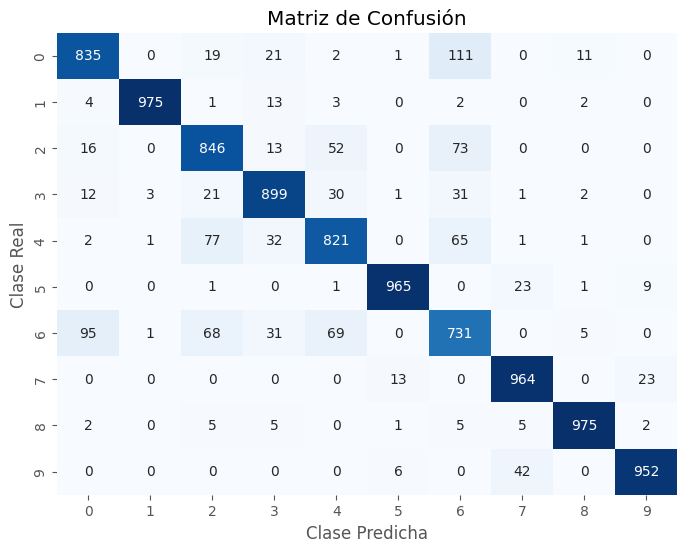

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

# Crea un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()


Como se puede observar, la matriz de correlacion muestra en su mayoria numeros muy bajos mostrando que existe poca correlacion entre ciertos datos. Los numeros en los ejes representan el tipo de prenda y se observa unicamente cierta relacion en algunos de ellos

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

Con nuestra matriz de confusión y estadísticas de desempeño podemos ver que se tuvieron números altos al momento de buscar el promedio de los pesos junto con su precisión y soporte de la red. Finalmente, lo último que nos arroja el código es un resumen de todo lo obtenido anteriormente, explicando capa por capa sus parámetros y figura así como el resultado final de parámetros simples y entrenados, el cual nos podemos dar cuenta que todos los parámetros obtenidos fueron entrenados.